Лабораторная работа №1
по дисциплине «Анализ данных».

> Задание:

Найти датасет.
* Произвести выборки,
* определить t-критерий Стьюдента.
* anova test
* Сделать выводы.

* H0 - у людей до 53 лет уровень сахара в крови натощак > 120 мг/дл встречается чаще, чем у людей после 53 лет
* H1 - у людей до 53 лет уровень сахара в крови натощак > 120 мг/дл встречается не чаще, чем у людей после 53 лет

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [12]:
with open('Heart_Attack_Data_Set.csv', 'r', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    a1 = []
    a2 = []
    next(data)
    for row in data:
        if int(row[0]) >= 53:
            a1.append(int(row[4]))
        if int(row[0]) < 53:
            a2.append(int(row[4]))

(array([ 3.,  4., 10., 19., 18., 15., 20., 10.,  4.,  8.,  7.,  2.]),
 array([141.        , 157.66666667, 174.33333333, 191.        ,
        207.66666667, 224.33333333, 241.        , 257.66666667,
        274.33333333, 291.        , 307.66666667, 324.33333333,
        341.        ]),
 <BarContainer object of 12 artists>)

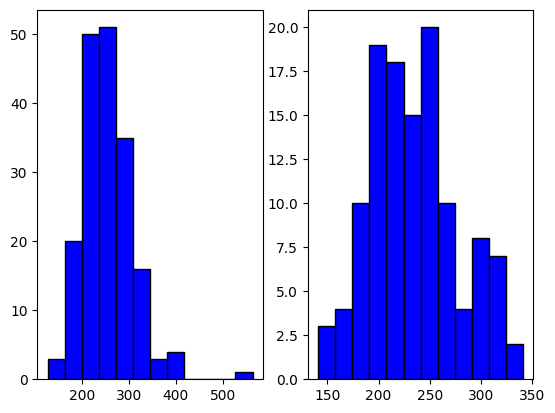

In [13]:
plt.subplot(1, 2, 1)
plt.hist(a1, color='blue', edgecolor='black', bins=int(100/8))

plt.subplot(1, 2, 2)
plt.hist(a2, color='blue', edgecolor='black', bins=int(100/8))

In [14]:
rez = stats.ttest_ind (a=a1, b=a2)
print(rez)

Ttest_indResult(statistic=3.352160113866897, pvalue=0.0009042382615676737)


#### т.к. значение р-теста (0.0009) меньше, чем альфа = 0,05, мы можем отвергнуть нулевую гипотезу

## ANOVA
Построим блочную диаграмму:

Text(0, 0.5, 'Давление')

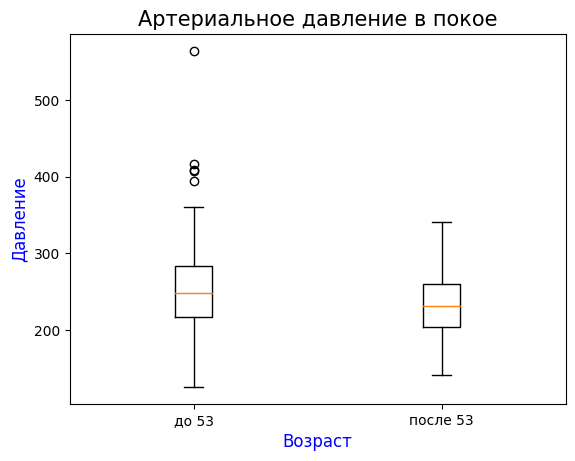

In [17]:
sq = [a1, a2]

plt.boxplot(sq, labels=['до 53', 'после 53'])
plt.title("Артериальное давление в покое", fontsize=15)
plt.xlabel("Возраст", fontsize=12, color="blue")
plt.ylabel("Давление", fontsize=12, color="blue")

In [18]:
from scipy.stats import f_oneway

f_oneway(a1, a2)

F_onewayResult(statistic=11.236977429000124, pvalue=0.0009042382615676749)

P < 0.05, поэтому можем отклонить нулевую гипотезу.